In [1]:
#Charger le repertoire des scripts
# import sys
# sys.path.append("C:/Users/svissiere/Documents/RepertoireDeTravail/xsREEF") 
import numpy as np
from matplotlib.pyplot import close, show
import matplotlib.pyplot as plt
import xarray as xr
from reef_models import reef_platform
from Profile import Profile
from tools import nlines
from tools_models import CheckSimu, ZarrName, shore
from Dicts import Dicos
from datetime import datetime as dtime
from os import path

# Model parametrization
## Range of investigated parameters

In [2]:
# Reference parameters

slopis=[6e-2] #, 10e-2, 13e-2]
# slopis = np.arange(2e-2, 16e-2, 4e-2)
slopi = 6e-2

Gms = [6e-3] #, 6e-3, 10e-3]
Gm = 10e-3

hmaxs = [20] #, 60, 120]        
hmax = 60

Dbars = [100] #, 300, 3000]
# Dbars = np.asarray(Dbars)
Dbar = 100

Evs = [100e-3]
Ev = 100e-3

us = [-0.2e-3] #, -0.2e-3, 0.6e-3]
u = -0.2e-3


## Model input dataset

In [3]:
# %create_setup -v reef
import xsimlab as xs

dt = 100
dico = Dicos()

# SL = 'Bintanja2008-1000k'
SL = 'Waelbroeck2002-137ky'
# SL = 'Waelbroeck2002b'
# SL = 'Holocene'
tmax = nlines(dico.SL_files[SL])*1e3
print(tmax)

ds_in0 = xs.create_setup(
    model=reef_platform,
    clocks={
        'time' : np.arange(0., tmax+dt, dt)
},
    master_clock = 'time',
    input_vars={
        # vertical land motion rate
        'vertical__u': u,
        # maximum water height for reef growth
        'grid__hmax': hmax,
        # uniform spacing
        'grid__spacing': 1,
        # initial slope of the substrate
        'grid__slopi': slopi,
        # filename for RSL reconstruction
        'SLstory__RSLin': SL,
        # maximum reef growth rate
        'construct__Gm': Gm,
        # Water height for open ocean
        'hfactor__how': 2,
        # Delta...
        'hfactor__Dbar': Dbar,
        # Eroded volume
        'eros__Ev': Ev,
        # Water height for wave base
        'eros__hwb': 3,
        # Coefficient for erosion efficiency, sea-bed
        'eros__beta1': 0.1,
        # Coefficient for erosion efficiency, cliff retreat
        'eros__beta2': 1,
        # Height of notch for volume eroded during cliff retreat
        'eros__hnotch': 1,
        # ---
        'depot__repos': 15e-2,
        # Elevation of antecedent terrace
        'init__zterr': -25,
        # Length of antecedent terrace
        'init__lterr': 10000,
    },
    output_vars={
        'init__x'       : None,
        'profile__z'    : 'time',
        'sealevel__asl' : 'time',
        'profile__xmin' : None,
        'profile__xmax' : None,
        'depot__dS'     : 'time',
        'construct__dG' : 'time',
    }
)

ds_in0.attrs['model_name'] = 'reef_platform'
ds_in0.attrs['store'] = 'Profile'

139000.0


# Run

2023-04-14 19:33:34.582168
/Users/pastier/REEF/Zarr/Profiles/reef_platform/reef_platform_Profile_Waelbroeck2002-137ky-u-0.2-slopi6.0-Gm6.0-hmax20-Dbar100-How2-Ev100.0-Hwb3-Zterr-25-lterr10000-tmax139ky-dt100y.zarr
simu /Users/pastier/REEF/Zarr/Profiles/reef_platform/reef_platform_Profile_Waelbroeck2002-137ky-u-0.2-slopi6.0-Gm6.0-hmax20-Dbar100-How2-Ev100.0-Hwb3-Zterr-25-lterr10000-tmax139ky-dt100y.zarr
t 0.0
t 100.0
Duration 0:01:46.492175
save


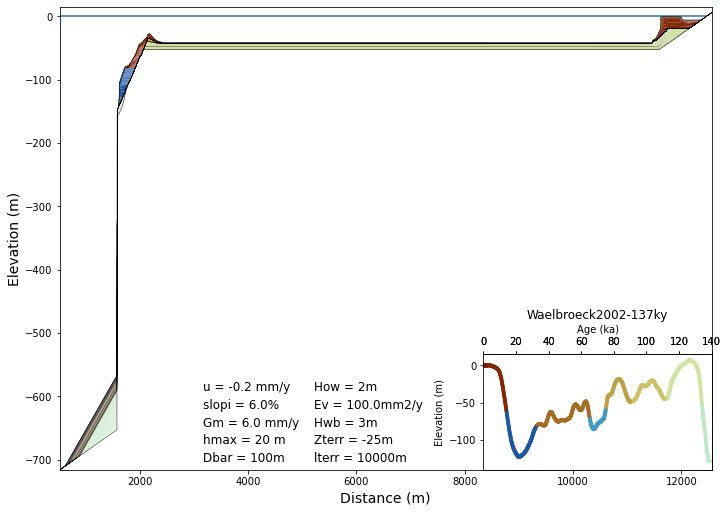

Duration 0:04:37.767274


In [4]:
# %matplotlib widget

for slopi in slopis:
    for Gm in Gms:
        for hmax in hmaxs:
            for Dbar in Dbars:
                for Ev in Evs:
                    for u in us:
              
                        t0=dtime.today()
                        print(t0)
                        
                        # Actualizing model input dataset
                        ds_in = ds_in0.xsimlab.update_vars(
                            model = reef_platform,
                            input_vars={
                                'vertical__u'   : u,
                                'grid__hmax'    : hmax,
                                'eros__Ev'      : Ev,
                                'construct__Gm' : Gm,
                                'grid__slopi'   : slopi,
                                'hfactor__Dbar' : Dbar,
                            }
                        )
                        
                        # Running the simulation if it doesn't exist
                        if CheckSimu(ds_in, simu=True, view=True):
                            ds = xr.open_zarr(ZarrName(ds_in))
                                                        
                            # Plotting figure
                            fig = Profile(ds)
                            fig.ProfileName('.png')
                            
#                             # If the figure already exists, skip the iteration
                            if path.exists(fig.namepath+fig.namefig):
                                print('Done')
                                close('all')
                                continue
                                
                            fig.PlotProfile()
#                             fig.PlotData('DemoProfil.txt')
                            fig.PlotASL()
                            fig.WriteParams()
                            
                            print('save')
                            fig.Savefig()
                            show()
                            close('all')
                            print('Duration', dtime.today()-t0)
